In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r"H:\My Drive\Python\Presentation\Pandas datasource\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST00001,Male,0,Yes,Yes,46,Yes,No,Month-to-month,Credit card,87.07,3992.34,No
1,CUST00002,Female,0,No,No,15,Yes,Fiber optic,Two year,Electronic check,90.09,1379.91,No
2,CUST00003,Male,1,No,No,25,Yes,Fiber optic,One year,Electronic check,40.40,985.28,No
3,CUST00004,Male,0,Yes,No,71,Yes,Fiber optic,Month-to-month,Electronic check,85.40,6107.29,Yes
4,CUST00005,Male,0,Yes,No,17,No,Fiber optic,One year,Credit card,101.84,1770.68,No


In [4]:
print(df.shape)
print(df.info())
print(df.describe())

(500, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       500 non-null    object 
 1   gender           500 non-null    object 
 2   SeniorCitizen    500 non-null    int64  
 3   Partner          500 non-null    object 
 4   Dependents       500 non-null    object 
 5   tenure           500 non-null    int64  
 6   PhoneService     500 non-null    object 
 7   InternetService  500 non-null    object 
 8   Contract         500 non-null    object 
 9   PaymentMethod    500 non-null    object 
 10  MonthlyCharges   500 non-null    float64
 11  TotalCharges     500 non-null    float64
 12  Churn            500 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 50.9+ KB
None
       SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     500.000000  500.000000      500.000000    500.000000
m

In [5]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.874
Yes    0.126
Name: proportion, dtype: float64

In [6]:
df.fillna(method='ffill', inplace=True)

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_7588\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [8]:
df['Avg_Spend'] = df['TotalCharges'] / (df['tenure'] + 1)

In [9]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Avg_Spend']
segmentation_data = df[features]

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)

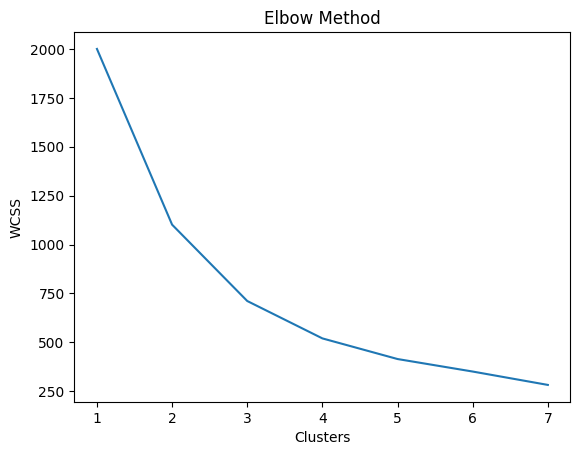

In [11]:
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(scaled_data)

In [13]:
segment_summary = df.groupby('Customer_Segment')[features].mean()
print(segment_summary)

                     tenure  MonthlyCharges  TotalCharges  Avg_Spend
Customer_Segment                                                    
0                 16.253731       92.600373   1502.318731  84.129546
1                 52.981651      100.601743   5274.896055  98.495304
2                 24.986301       40.217808    902.605137  36.233692
3                 51.369369       61.751622   3117.237748  60.484439


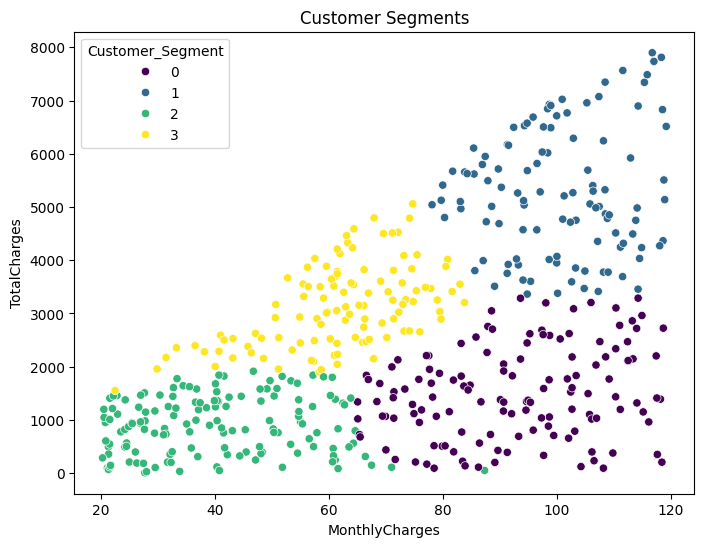

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['MonthlyCharges'], 
                y=df['TotalCharges'], 
                hue=df['Customer_Segment'], 
                palette='viridis')
plt.title("Customer Segments")
plt.show()

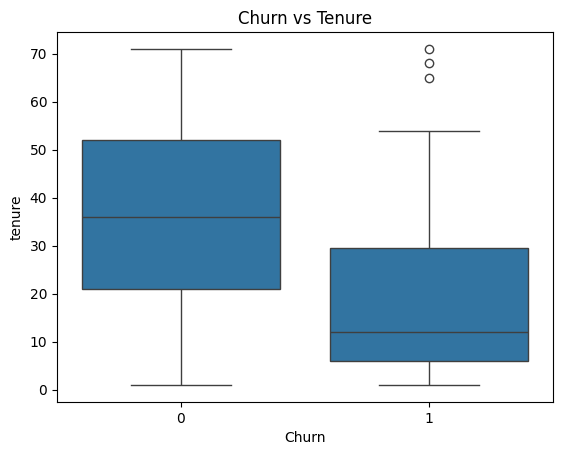

In [15]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Churn vs Tenure")
plt.show()

In [16]:
print("""
Insights:
1. High-value customers contribute the majority of revenue.
2. Customers with shorter tenure show higher churn.
3. High monthly charges correlate with churn.
4. Segment 2 has the highest churn and should be targeted.
""")


Insights:
1. High-value customers contribute the majority of revenue.
2. Customers with shorter tenure show higher churn.
3. High monthly charges correlate with churn.
4. Segment 2 has the highest churn and should be targeted.



In [17]:
high_risk = df[df['Customer_Segment'] == 2]
print(high_risk.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2   CUST00003    Male              1      No         No      25          Yes   
5   CUST00006  Female              0     Yes        Yes       9          Yes   
7   CUST00008    Male              0      No        Yes      48          Yes   
9   CUST00010  Female              0      No        Yes      63          Yes   
10  CUST00011    Male              0     Yes        Yes       2          Yes   

   InternetService        Contract     PaymentMethod  MonthlyCharges  \
2      Fiber optic        One year  Electronic check           40.40   
5              DSL        Two year  Electronic check           25.00   
7               No        Two year     Bank transfer           22.95   
9      Fiber optic        One year     Bank transfer           21.58   
10              No  Month-to-month  Electronic check           27.71   

    TotalCharges  Churn  Avg_Spend  Customer_Segment  
2         985.28      0  37.895